In [1]:
import akshare as ak
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=ak.stock_zh_a_daily(symbol="sh600000", start_date='20151103', end_date='20201116', adjust="hfq")


In [3]:
#MA5
##use rolling() to compute average 
#MA5=df['close'].rolling(5).mean()
MA5=[]
for i in range(4, len(df)):
    avg=0.0
    for j in range(i-4, i+1):
        avg=avg+(df.iloc[j, 3]) #close
        #print(avg)
    MA5.append(avg/5.0)

MA5=pd.Series(MA5, index=df.iloc[4:, :].index)


In [4]:
#MA20
MA20=[]
for i in range(19, len(df)):
    avg=0.0
    for j in range(i-19, i+1):
        avg=avg+(df.iloc[j, 3]) #close
        #print(avg)
    MA20.append(avg/20.0)

MA20=pd.Series(MA20, index=df.iloc[19:, :].index)


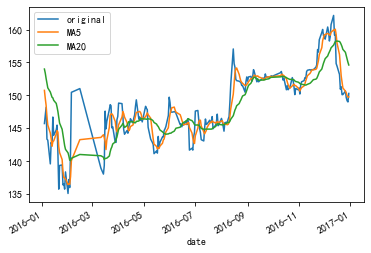

In [5]:
df_Kplot= pd.concat([df.iloc[19:, 3], MA5.iloc[15:], MA20], axis=1)
df_Kplot.columns=['original', 'MA5', 'MA20']
df_Kplot['2016'].plot()

In [6]:
golden_cross=[]
dead_cross=[]
for i in range(1, (len(df_Kplot))):
    if df_Kplot['MA5'][i] > df_Kplot['MA20'][i] and df_Kplot['MA5'][i-1] < df_Kplot['MA20'][i-1]:
        golden_cross.append( df_Kplot.index[i].to_pydatetime())
    if df_Kplot['MA5'][i] < df_Kplot['MA20'][i] and df_Kplot['MA5'][i-1] > df_Kplot['MA20'][i-1]:
        dead_cross.append( df_Kplot.index[i].to_pydatetime())
#golden_cross


In [7]:
# suppose we buy at all golden crosses, and sell at all dead crosses
# how much can we gain?

golden_cross=pd.DataFrame(golden_cross)
golden_cross['trade']=1
dead_cross=pd.DataFrame(dead_cross)
dead_cross['trade']=0
trade_dates=pd.concat([golden_cross, dead_cross], ignore_index=True )
trade_dates.columns=['date','trade']
pd.set_option('display.max_rows', None)
trade_dates=trade_dates.sort_values(by='date', ignore_index=True)
trade_dates

,date,trade
0,2015-12-15,0
1,2015-12-24,1
2,2015-12-29,0
3,2016-02-15,1
4,2016-04-12,0
5,2016-04-19,1
6,2016-04-29,0
7,2016-05-03,1
8,2016-05-10,0
9,2016-05-27,1


In [8]:
budget=100000000
hold=0 # in hand
for i in range(0,len(trade_dates)):
    if trade_dates['trade'][i]==1 and budget>0:
        price=df.loc[trade_dates['date'][i], 'close']
        hold+=np.floor(budget/(100*price))
        budget-=price*hold*100
        #print('now we have '+str(budget))
    if trade_dates['trade'][i]==0 and hold>0:
        price=df.loc[trade_dates['date'][i], 'close']
        budget+=price*hold*100
        hold = 0
        #print('now we have '+str(budget))
budget

89193558.00000003